# Load LRP results and build graphs

## Define some functions which aggregate the results

In [1]:
def avg_lrp_by_pos(data, seg='inp'):
    count = 0
    res = np.zeros(data[0][seg + '_lrp'].shape[0])
    for i in range(len(data)):
        if not any(np.isnan(data[i][seg + '_lrp'])):
            res += np.sum(data[i][seg + '_lrp'], axis=-1)
            count += 1
    res /= count
    return res


from scipy.stats import entropy

def all_inp_entropy(data, pos=None):
    res = []
    for i in range(len(data)):
        if not any(np.isnan(data[i]['inp_lrp'])):
            res_ = np.sum(data[i]['inp_lrp'], axis=-1)
            try:
                if pos is None:
                    res += [entropy(data[i]['inp_lrp'][p]/res_[p]) for p in range(data[i]['inp_lrp'].shape[0])]
                else:
                    res.append(entropy(data[i]['inp_lrp'][pos] / res_[pos]))
            except Exception:
                pass
    return res

def all_out_entropy(data, pos):
    res = []
    for i in range(len(data)):
        if not any(np.isnan(data[i]['out_lrp'])):
            res_ = np.sum(data[i]['out_lrp'], axis=-1)
            res.append(entropy(data[i]['out_lrp'][pos][:pos + 1] / res_[pos]))
    return res

def avg_lrp_by_src_pos_normed(data, ignore_eos=False):
    count = 0
    tgt_tokens = data[0]['inp_lrp'].shape[0]
    if ignore_eos:
        res = np.zeros(data[0]['inp_lrp'].shape[1] - 1)
    else:
        res = np.zeros(data[0]['inp_lrp'].shape[1])
    for i in range(len(data)):
        if not any(np.isnan(data[i]['inp_lrp'])):
            if ignore_eos:
                elem = data[i]['inp_lrp'][:, :-1] / np.sum(data[i]['inp_lrp'][:, :-1], axis=1).reshape([tgt_tokens, 1])
            else:
                elem = data[i]['inp_lrp'] / np.sum(data[i]['inp_lrp'], axis=1).reshape([tgt_tokens, 1])
            res += np.sum(elem, axis=0)
            count += 1
    res /= count
    res /= tgt_tokens 
    if ignore_eos:
        res *= (data[0]['inp_lrp'].shape[1] - 1)
    else:
        res *= data[0]['inp_lrp'].shape[1]
    return res

## Load results 

In [2]:
pictdir = # out dir, where to save the figures
dir_res = # dir with the LRP results
fname = # fname with the LRP results
data = pickle.load(open(dir_res + fname, 'rb'))

## Plot the graphs

In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import pylab

%matplotlib inline

plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
plt.rc('font', **font)

In [4]:
cmap = cm.get_cmap('Spectral', 30)    # PiYG
spectral_map = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]

color = spectral_map[-1]

### Source influence for each target position

/home/lena-voita/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


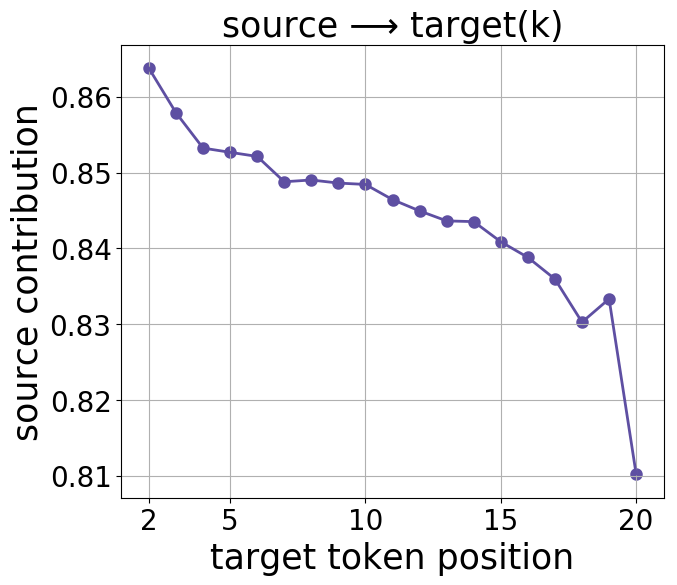

In [5]:
fig = plt.figure(figsize=(7, 6), dpi=100)

res = avg_lrp_by_pos(data, seg='inp')[1:]
plt.plot(range(2, len(res)+2), res, lw=2., color=color)
plt.scatter(range(2, len(res)+2), res, lw=3.0, color=color)

plt.xlabel("target token position", size=25)
plt.ylabel("source contribution", size=25)
plt.yticks(size=20)
plt.xticks([2, 5, 10, 15, 20], size=20)
plt.title('source ⟶ target(k)', size=25)
plt.grid()

pylab.savefig(pictdir + 'YOUR FNAME', bbox_inches='tight')

### Total influence of each source token to the whole output

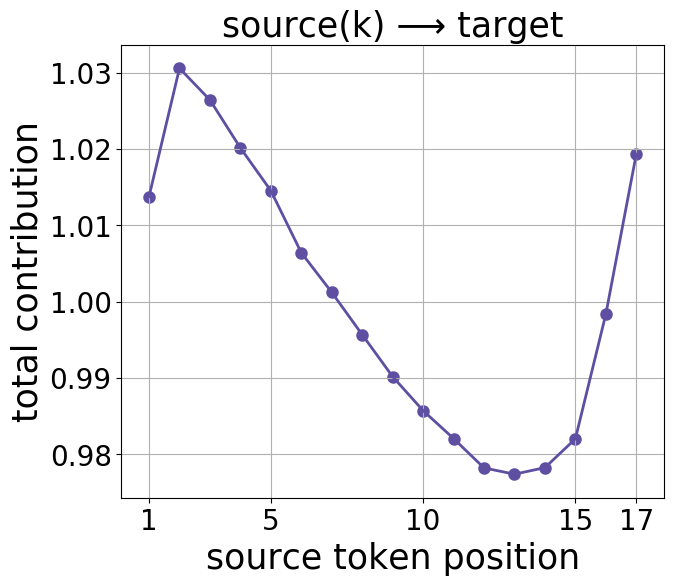

In [6]:
fig = plt.figure(figsize=(7,6), dpi=100)

res = avg_lrp_by_src_pos_normed(data)
plt.plot(range(1, len(res)+1), res, lw=2., color=color)
plt.scatter(range(1, len(res)+1), res, lw=3.0, color=color)

plt.xlabel("source token position", size=25)
plt.ylabel("total contribution", size=25)
plt.yticks(size=20)
plt.xticks([1, 5, 10, 15, 17] , size=20)
plt.title('source(k) ⟶ target', size=25)
plt.grid()

pylab.savefig(pictdir + 'YOUR FNAME', bbox_inches='tight')

### Entropy of source contributions

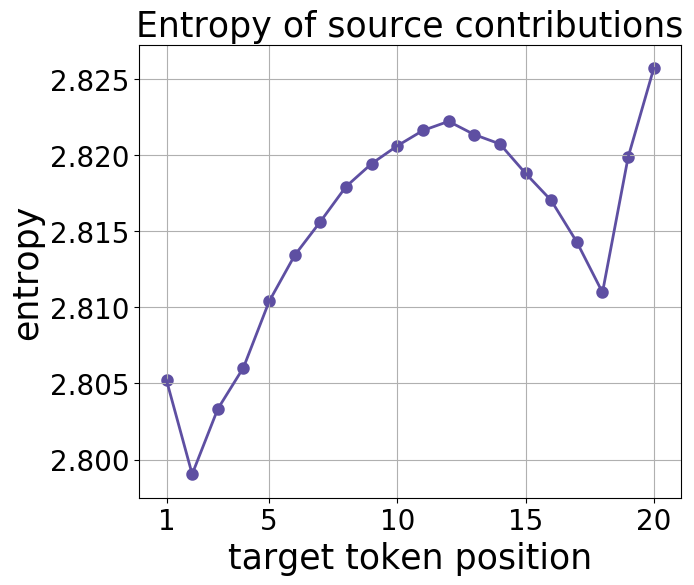

In [9]:
fig = plt.figure(figsize=(7, 6), dpi=100)

res = [np.mean(all_inp_entropy(data, pos=pos)) for pos in range(20)]
plt.plot(range(1, len(res)+1), res, lw=2., color=color)
plt.scatter(range(1, len(res)+1), res, lw=3.0, color=color)

plt.xlabel("target token position", size=25)
plt.ylabel("entropy", size=25)
plt.yticks(size=20)
plt.xticks([1, 5, 10, 15, 20] ,size=20)
plt.title('Entropy of source contributions', size=25)
plt.grid()

pylab.savefig(pictdir + 'YOUR FNAME', bbox_inches='tight')

### Entropy of target contributions

/home/lena-voita/.local/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


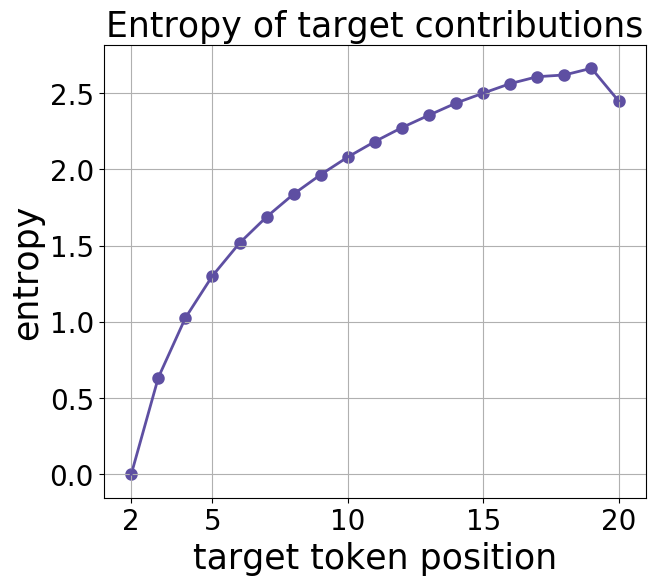

In [12]:
fig = plt.figure(figsize=(7,6), dpi=100)

res = [np.mean(all_out_entropy(data, pos=pos)) for pos in range(20)]
plt.plot(range(1, len(res)+1), res, lw=2., color=color)
plt.scatter(range(1, len(res)+1), res, lw=3.0, color=color)

plt.xlabel("target token position", size=25)
plt.ylabel("entropy", size=25)
plt.yticks(size=20)
plt.xticks([2, 5, 10, 15, 20], size=20)
plt.title('Entropy of target contributions', size=25)
plt.grid()

pylab.savefig(pictdir + 'YOUR FNAME', bbox_inches='tight')